# SCC0230 - Atividade avaliativa: Engenharia de Conhecimento

**Nome:** Breno Lívio Silva de Almeida

**Nº USP:** 10276675

## Introdução

Em ciências da computação, uma ontologia engloba uma representação, nomeação formal e definição das categorias, propriedades e relações entre os conceitos, dados e entidades que fundamentam um, muitos ou todos os domínios do discurso. Mais simplesmente, uma ontologia é uma forma de mostrar as propriedades de uma área temática e como elas estão relacionadas, definindo um conjunto de conceitos e categorias que representam o assunto. 

O conceito por si só pode ser usado para representar, por exemplo, conexões entre certos objetos em um conjunto de dados por meio das ontologias definidas. Redes sociais e aplicativos de música são exemplos que acabam criando ontologias para relacionar usuários e músicas entre si, para criar um possível [sistema de recomendação](http://ceur-ws.org/Vol-405/paper3.pdf).

Para esse trabalho vamos analisar como o aplicativo [Spotify](https://www.spotify.com/) recomenda artistas por meio de um grafo de conhecimento. Serão apresentados códigos em Python apenas para demonstrar como foram obtidos os grafos.


## Desenvolvimento

Podemos representar as ontologias que existem no Spotify por meio de grafos de conhecimento ao coletar os artistas que a plataforma recomenda ao usuário dado um artista que ele ouve. Vamos fazer isso usando a biblioteca do Python [Spotipy](https://spotipy.readthedocs.io/en/2.12.0/) e [NetworkX](https://networkx.org/documentation/stable/index.html) para os grafos.

### Código

In [1]:
!pip install spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randrange
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [3]:
# id e segredo da API do Spotify
client_id = 'deed28d533634b2ab7a7af009a25de0a' 
client_secret = '8fa031a7e9594866a5b156def7666437'
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotipy.Spotify(client_credentials_manager=client_credentials_manager)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [46]:
class SpotifyArtistsQuery:

    def __init__(self, name):
        self.name = name
        self.related_artist = None

    # Function to get the id of the specified named artist
    def get_artist_uri(self):

        row = spotify.search(q='artist:' + self.name, type='artist')['artists']['items'][0]['uri']
        uri = row.split(':')[2]

        # Return the uri of the specified named artist
        return uri

    # Function to get the related artist data
    def relation_list(self, size):

        related_artist = []

        # First, get the data of the artist directly related to the specified artist
        for i in spotify.artist_related_artists(self.get_artist_uri())['artists']:
            related_artist.append([spotify.artist(self.get_artist_uri())['name'], i['name'], i['uri'].split(':')[2]])

        # If you follow the second level or higher, turn around from here
        if size > 1:
            count = 0

            size = size-1

            for i in range(size):
                head = count
                tail = len(related_artist)
                for uri in np.array(related_artist)[:,2][head:tail]:
                    key_artist = spotify.artist(uri)['name']
                    for x in spotify.artist_related_artists(uri)['artists']:
                        related_artist.append([key_artist,x['name'], x['uri'].split(':')[2]])
                count += tail

            self.related_artist = related_artist
        else:
            self.related_artist = related_artist

    # Function to change the color of a node when drawing
    def fnc_color(self, siz):
        colorlist = ['tomato', "moccasin", "palegreen", "pink", "lightblue", "thistle", "lightgrey", "w"]

        if siz >=1000:
            return colorlist[0]
        elif siz >=500:
            return colorlist[1]
        elif siz  >=250:
            return colorlist[2]
        elif siz >= 100:
            return colorlist[3]
        elif siz >= 50:
            return colorlist[4]
        else:
            return colorlist[5]

    # Functions to draw a relationship diagram of the artist
    def generate_relation_map(self):
        G = nx.Graph() 

        for i in self.related_artist:
            G.add_edge(i[0], i[1])

        plt.figure(figsize = [50, 50])

        pos = nx.spring_layout(G, seed = 1, k = 0.2)

        nx.draw_networkx_labels(G, pos, font_color='k', font_family='IPAexGothic')

        nx.draw_networkx_nodes(G, pos, alpha = 0.7, node_shape="o",
                             linewidths = 1,
                               # Size and size of the node based on degree centrality (how many lines are coming out of that node)!
                               node_color = list(map(self.fnc_color, [nx.degree_centrality(G)[i]*20000 for i in G.nodes])),
                               node_size = [nx.degree_centrality(G)[i]*20000 for i in G.nodes])

        nx.draw_networkx_edges(G, pos, alpha=0.3)


### Grafos de conhecimento

Vamos procurar os artistas relacionados de forma direta com a banda Led Zeppelin no Spotify:

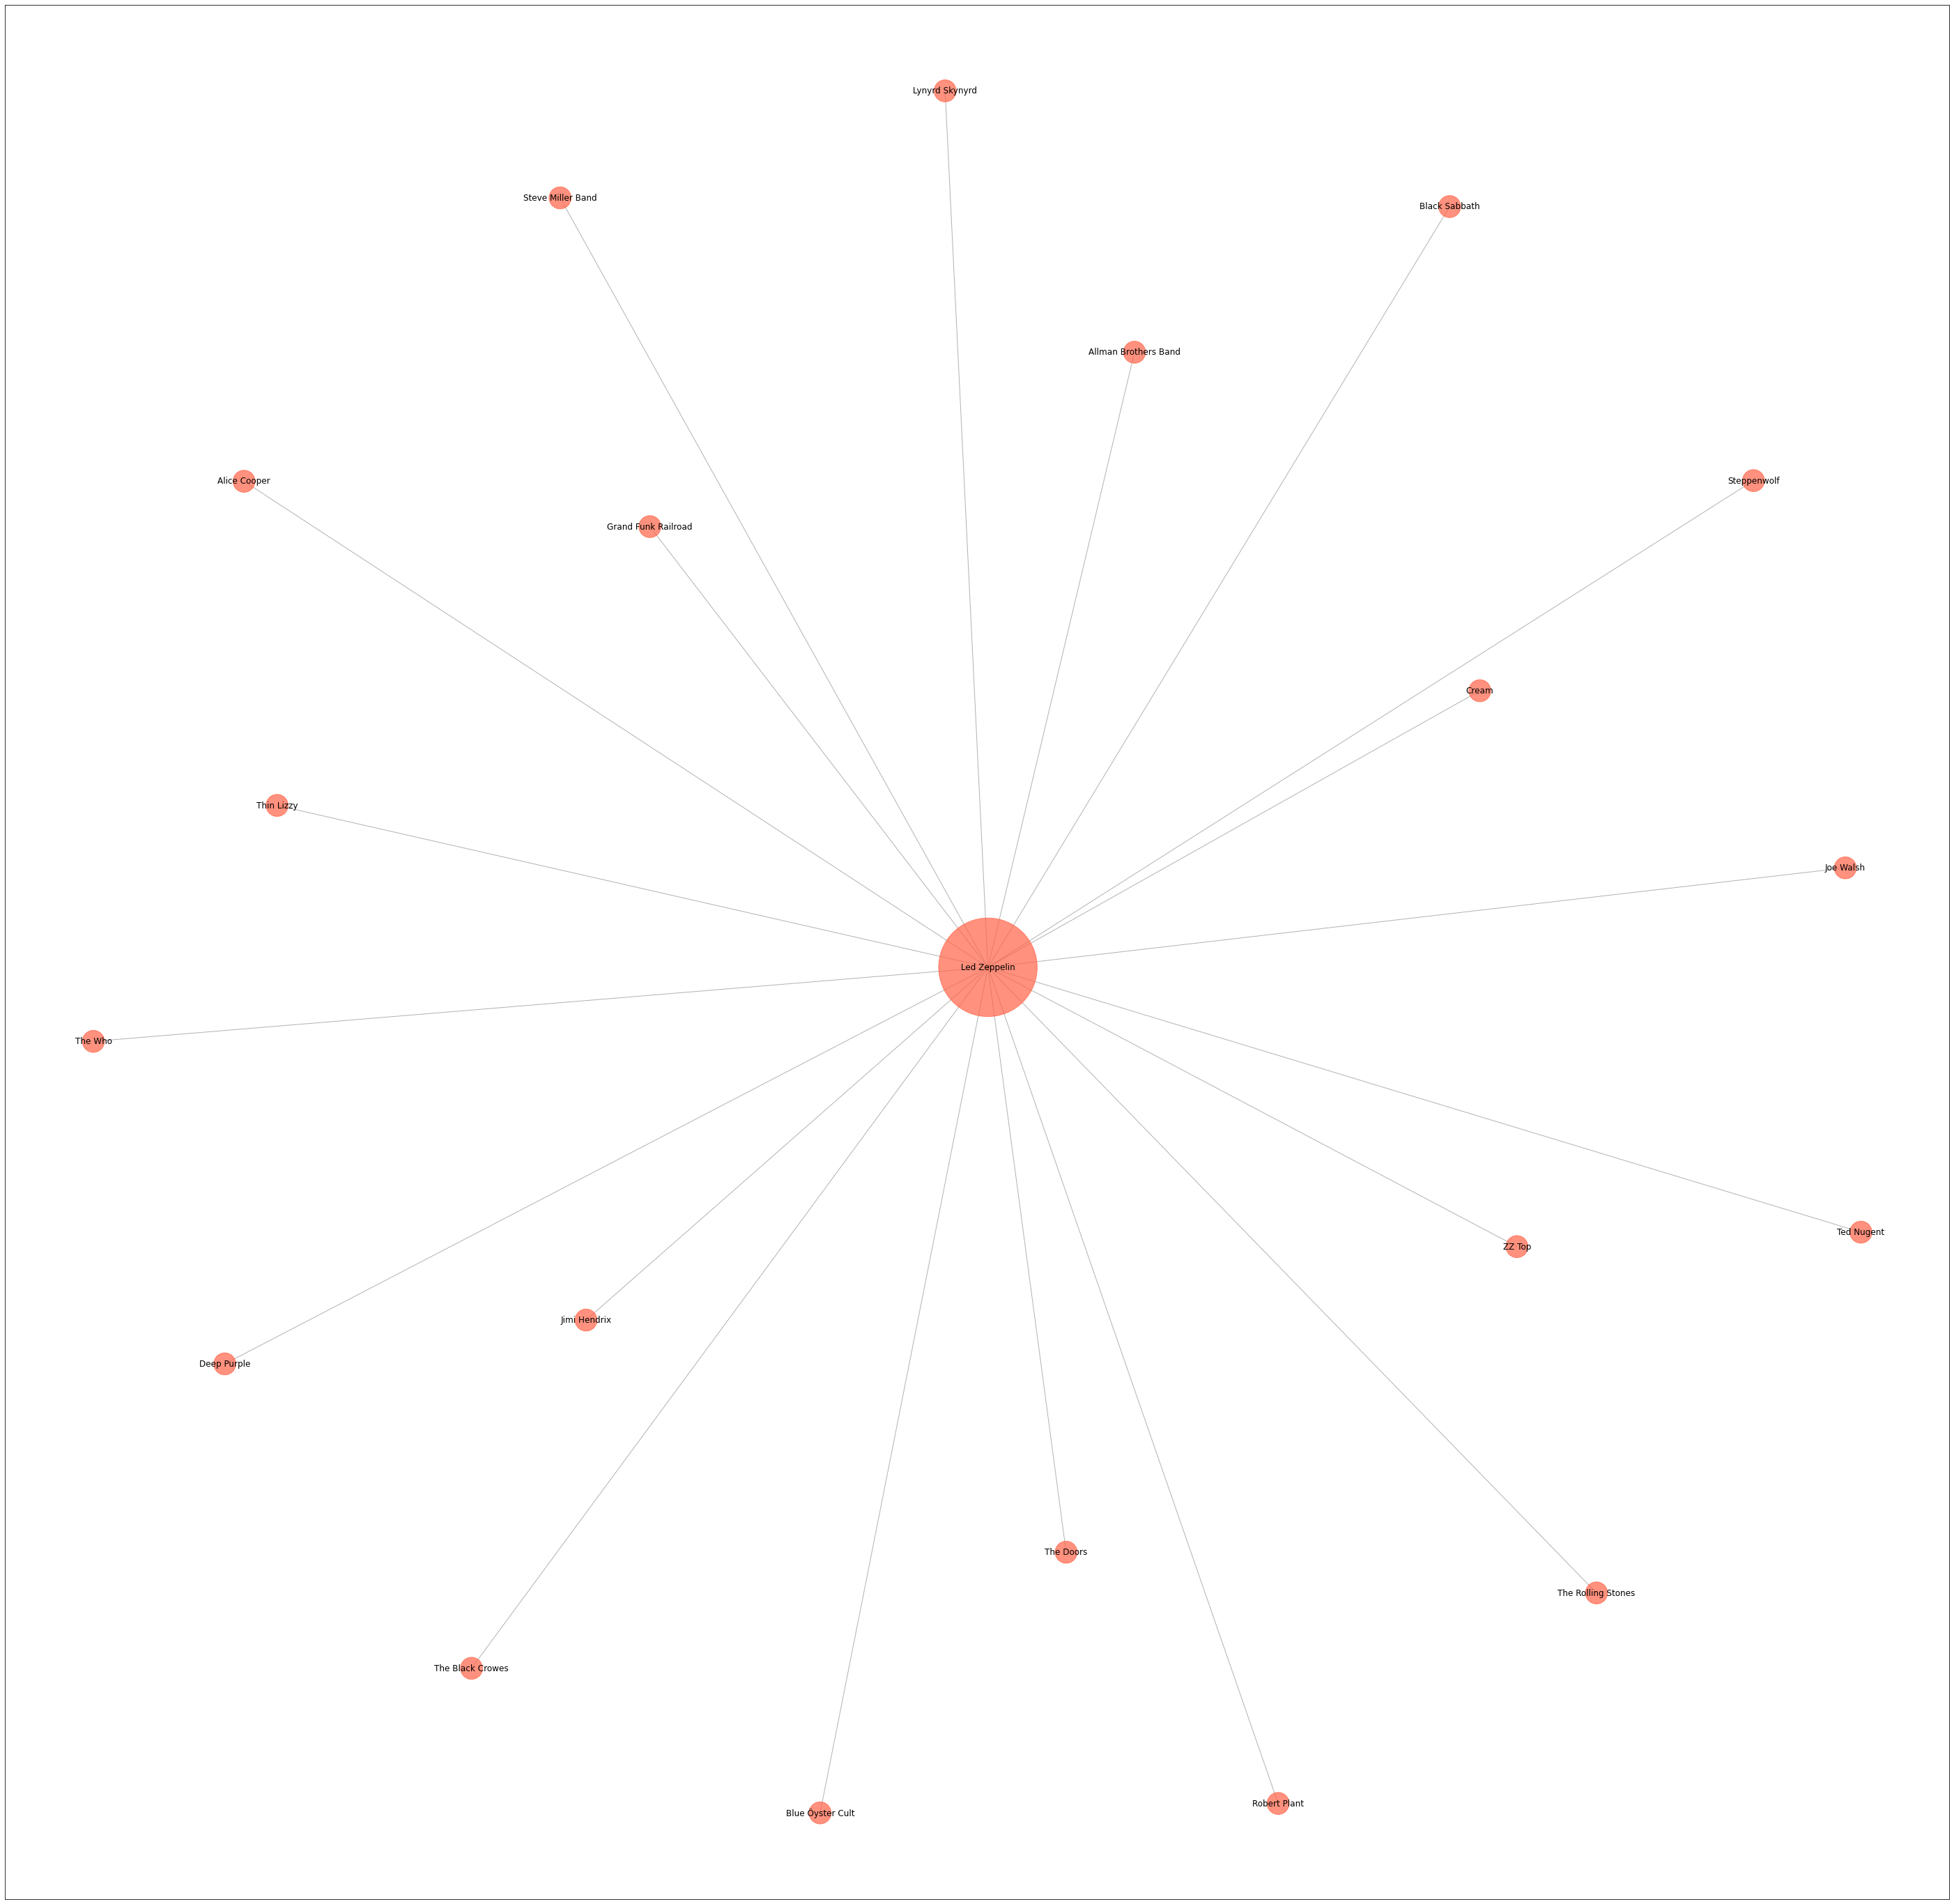

In [49]:
s = SpotifyArtistsQuery('Led Zeppelin')
s.relation_list(1) # Indicação o grau de conexão
s.generate_relation_map()

Vamos procurar os artistas de segundo grau relacionados com a banda Led Zeppelin no Spotify:

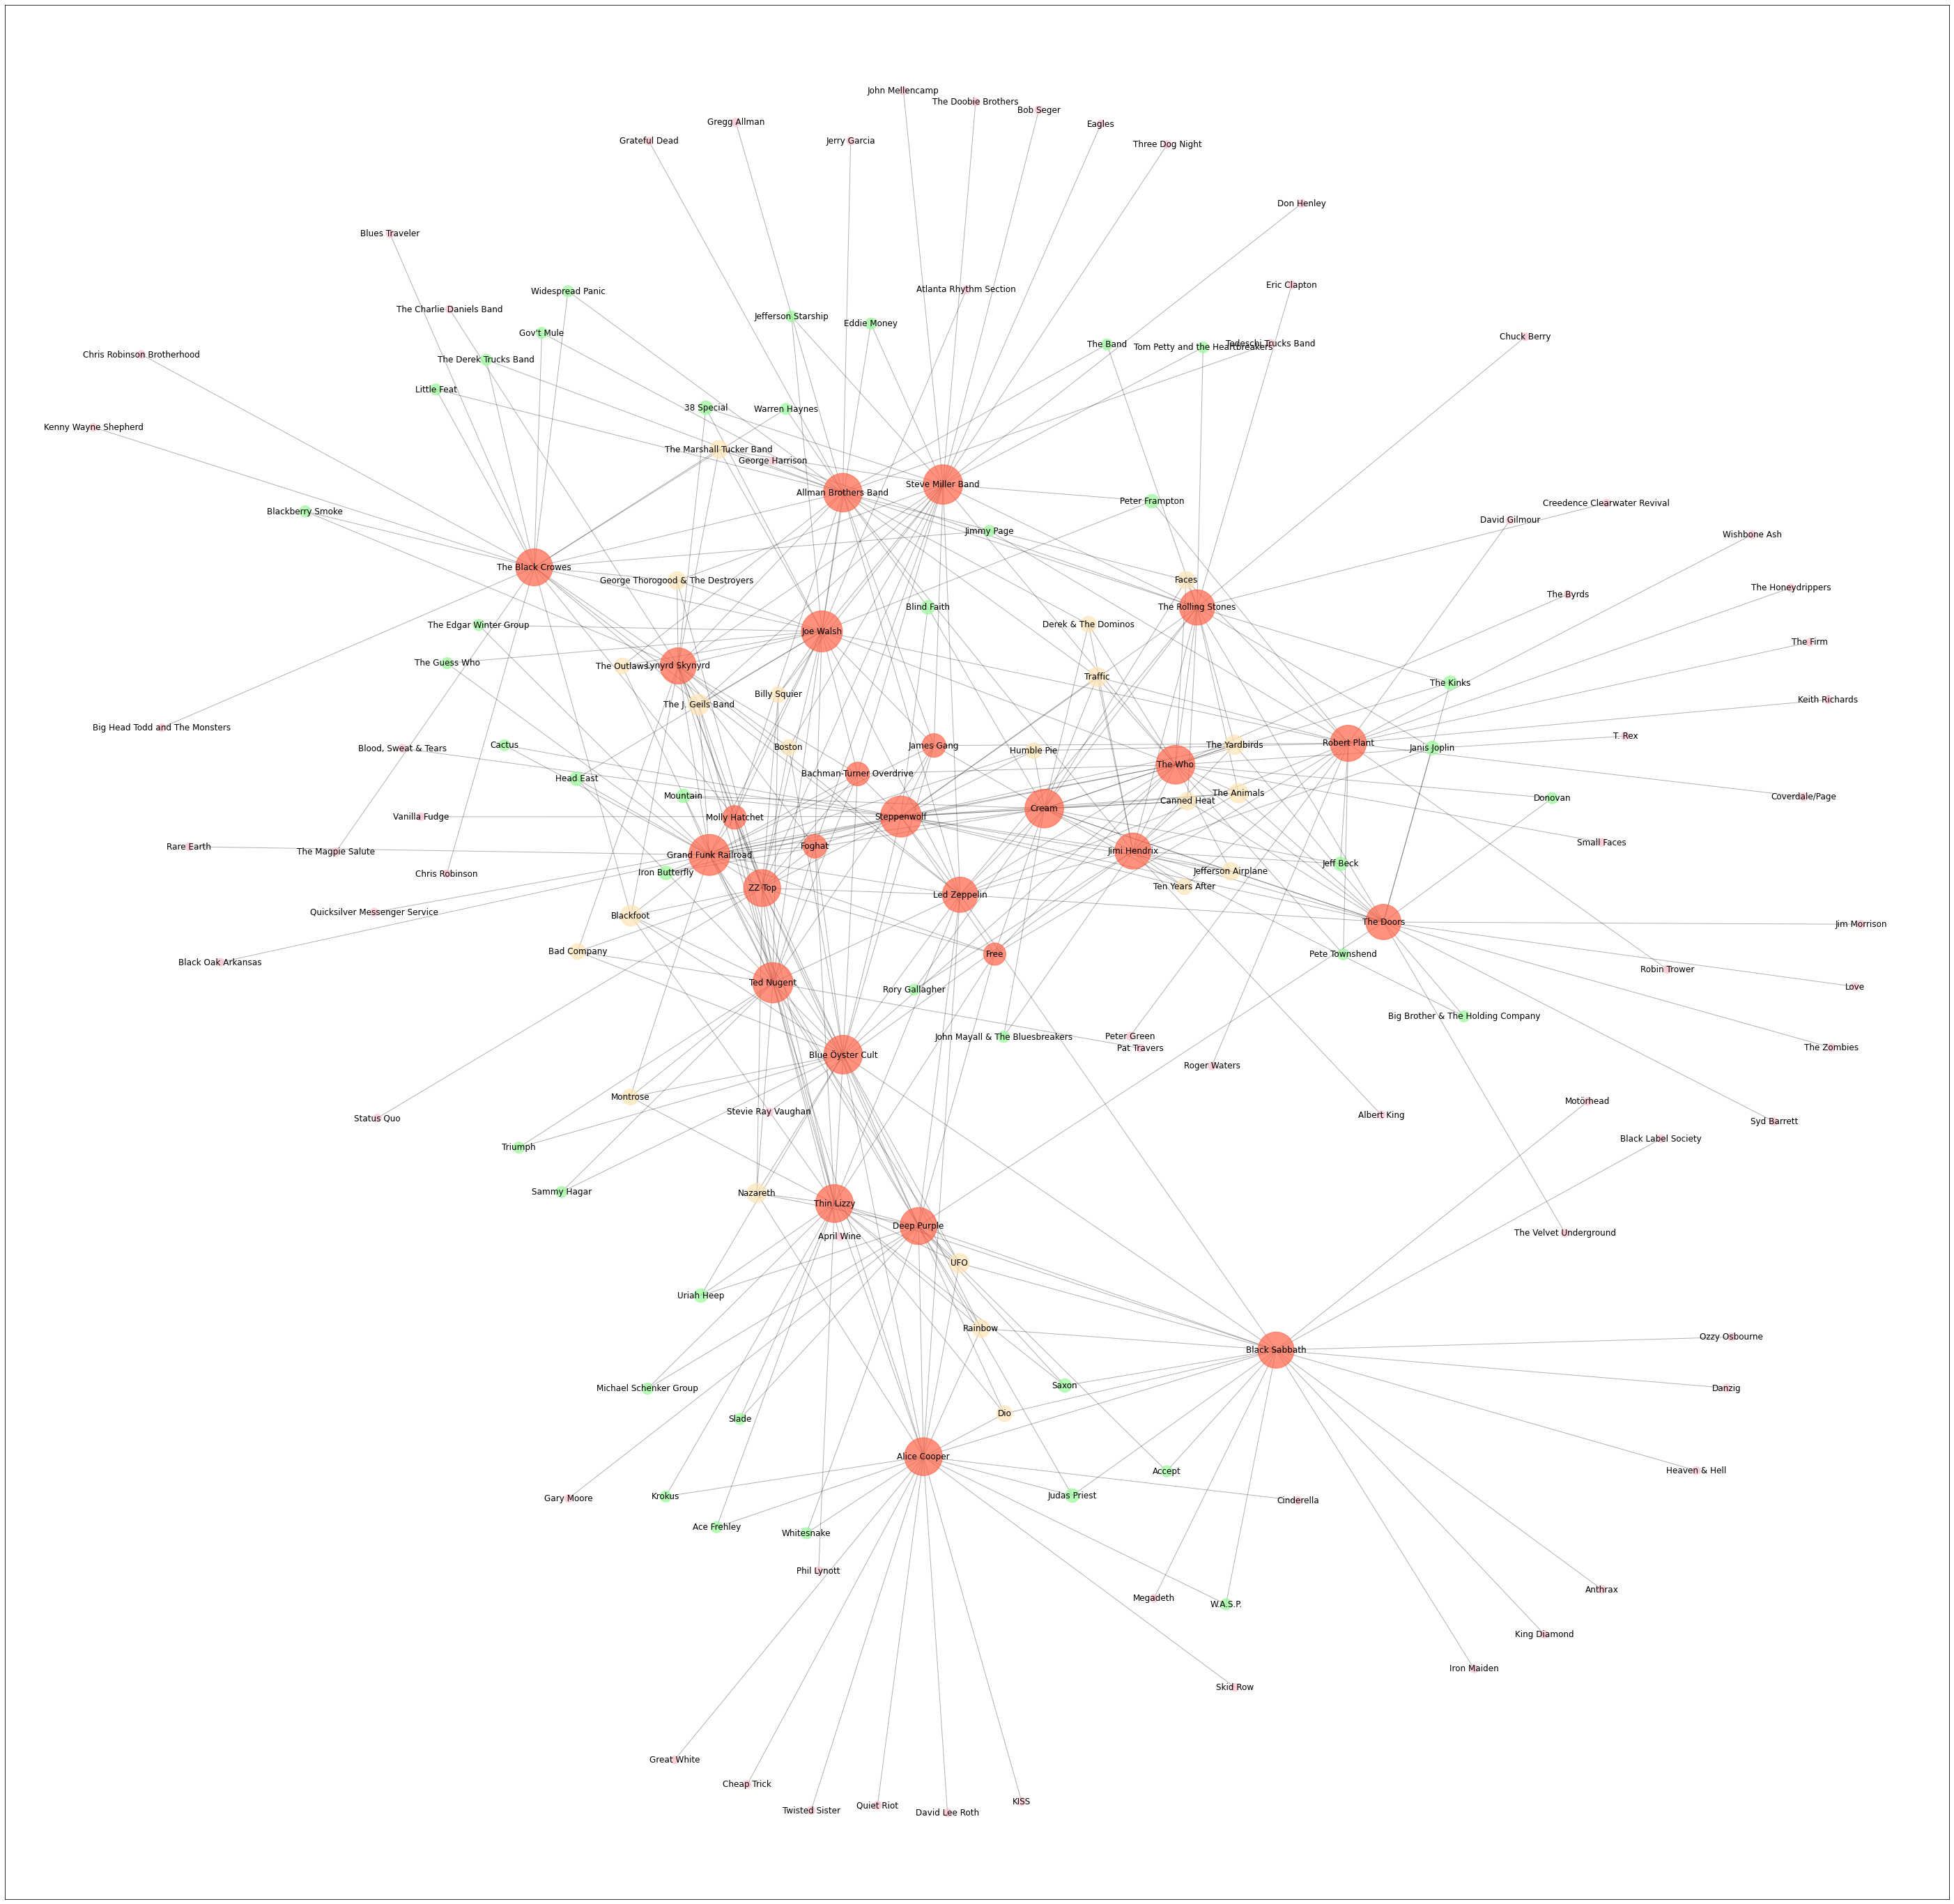

In [50]:
s = SpotifyArtistsQuery('Led Zeppelin')
s.relation_list(2) # Indicação o grau de conexão
s.generate_relation_map()

In [ ]:
s = SpotifyArtistsQuery('Led Zeppelin')
s.relation_list(3) # Indicação o grau de conexão
s.generate_relation_map()